In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
EPOCHS = 100

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Przygotowanie danych
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
#ile czasu zajmuje jeden krok dla poszczególnych wartości batch size?
batch_sizes = [8, 16, 32, 64, 128, 256]
histories = []

for batch_size in batch_sizes:
    print(f"Ustawiona wielość zbioru: {batch_size}")
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=5, batch_size=batch_size, validation_data=(test_images, test_labels))
    histories.append(history)

Ustawiona wielość zbioru: 8
Epoch 1/5
7500/7500 [==============================] - 57s 7ms/step - loss: 0.2079 - accuracy: 0.9395 - val_loss: 0.1085 - val_accuracy: 0.9668
Epoch 2/5
7500/7500 [==============================] - 59s 8ms/step - loss: 0.0938 - accuracy: 0.9709 - val_loss: 0.0859 - val_accuracy: 0.9742
Epoch 3/5
7500/7500 [==============================] - 44s 6ms/step - loss: 0.0678 - accuracy: 0.9790 - val_loss: 0.0855 - val_accuracy: 0.9758
Epoch 4/5
7500/7500 [==============================] - 37s 5ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.0706 - val_accuracy: 0.9787
Epoch 5/5
7500/7500 [==============================] - 43s 6ms/step - loss: 0.0393 - accuracy: 0.9868 - val_loss: 0.0844 - val_accuracy: 0.9765
Ustawiona wielość zbioru: 16
Epoch 1/5
3750/3750 [==============================] - 22s 5ms/step - loss: 0.2265 - accuracy: 0.9344 - val_loss: 0.1162 - val_accuracy: 0.9640
Epoch 2/5
3750/3750 [==============================] - 18s 5ms/step - loss: 0.0

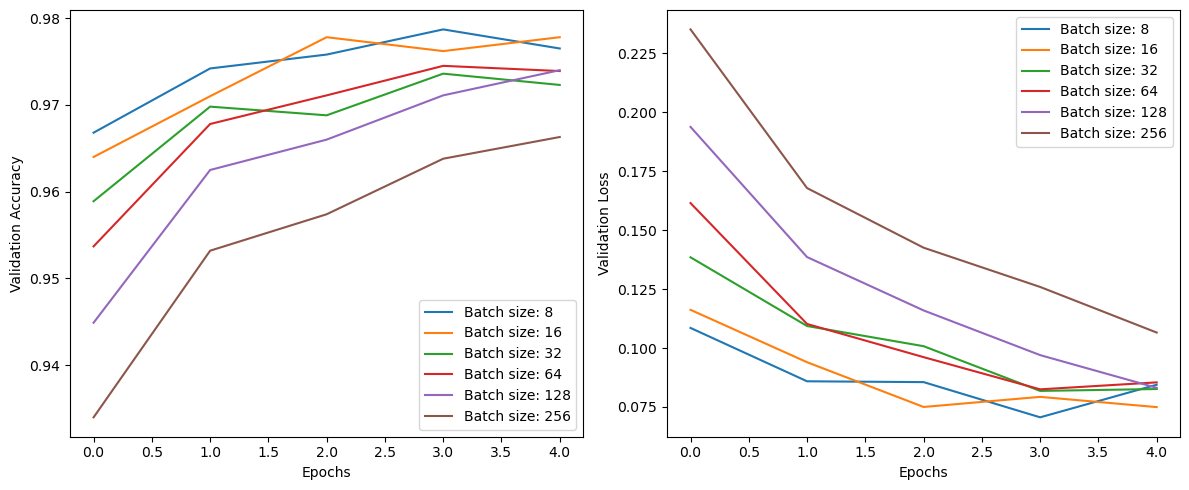

In [4]:
# Wygenerowanie wykresów
plt.figure(figsize=(12, 5))

# Dokładność
plt.subplot(1, 2, 1)
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

# Strata
plt.subplot(1, 2, 2)
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Batch size: {batch_sizes[i]}')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()